In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# !pip install scipy
# !pip install statsmodels
# !pip install pingouin

In [3]:
from scipy import stats 
import statsmodels as sm
import pingouin as pg

# Estadistica para Ciencia de Datos

#### Ejercicio 1: Estimaciones de Ubicación de la Población y las Tasas de Homicidios

La Tabla 1-2 muestra las primeras filas del conjunto de datos que contiene la población y las tasas de homicidios (en unidades de asesinatos por cada 100,000 personas por año) para cada estado de EE. UU. (Censo de 2010).

| Estado       | Población  | Tasa de Homicidios | Abreviatura |
|--------------|-------------|-------------------|-------------|
| Alabama      | 4,779,736   | 5.7               | AL          |
| Alaska       | 710,231     | 5.6               | AK          |
| Arizona      | 6,392,017   | 4.7               | AZ          |
| Arkansas     | 2,915,918   | 5.6               | AR          |
| California   | 37,253,956  | 4.4               | CA          |
| Colorado     | 5,029,196   | 2.8               | CO          |
| Connecticut  | 3,574,097   | 2.4               | CT          |
| Delaware     | 897,934     | 5.8               | DE          |

Calcula la media, la media recortada, la media ponderada y la mediana para la población usando Pandas, Scipy y Pingouine (Opcional: Statsmodels). Utilice el fichero `state.csv`

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Cargar los datos desde el archivo CSV
file_path = 'state.csv'
state_data = pd.read_csv(file_path)

# Verificar el tipo de datos de las columnas
print(state_data.dtypes)

# Convertir la columna 'Population' a valores numéricos si es necesario
if state_data['Population'].dtype == 'object':
    state_data['Population'] = state_data['Population'].str.replace(',', '').astype(float)

# Calcular la media
mean_population = state_data['Population'].mean()

# Calcular la media recortada (porcentaje de recorte del 10%)
trimmed_mean_population = trim_mean(state_data['Population'], 0.1)

# Calcular la media ponderada (usando la misma población como pesos para ilustración)
weighted_mean_population = np.average(state_data['Population'], weights=state_data['Population'])

# Calcular la mediana
median_population = state_data['Population'].median()

# Mostrar los resultados
mean_population, trimmed_mean_population, weighted_mean_population, median_population




State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object


(6162876.3, 4783697.125, 13620491.638786951, 4436369.5)

#### Ejercicio 2. Investigar cómo se interpreta estadísticamente la medida de tendecia central: `moda`.  
Buscar ejemplos concretos donde se aplique la moda. Desarrolle un ejemplo con Pandas, Scipy, Statsmodels y Pingouine

In [6]:
import pandas as pd

# Cargar los datos desde el archivo CSV
file_path = 'state.csv'
state_data = pd.read_csv(file_path)

# Calcular la moda usando pandas
mode_murder_rate = state_data['Murder.Rate'].mode()
mode_murder_rate


0    1.6
1    2.0
2    5.7
Name: Murder.Rate, dtype: float64

In [7]:
from scipy import stats

# Calcular la moda usando scipy
mode_murder_rate_scipy = stats.mode(state_data['Murder.Rate'])
mode_murder_rate_scipy


ModeResult(mode=1.6, count=3)

>   **Ejercicio 3**. Con la misma dataset del ejercicio 2 (`state.csv`) calcule todas las medidas de dispersión dadas en esta en clase (incluyendo el cálculo del umbral para detectar outliers usando la desviación absoluta mediana) sobre la variable Población. Utilizar Pandas, Numpy y SciPy. Interpretar resultados.

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# Cargar los datos desde el archivo CSV
file_path = 'state.csv'
state_data = pd.read_csv(file_path)

# Convertir la columna 'Population' a valores numéricos si es necesario
if state_data['Population'].dtype == 'object':
    state_data['Population'] = state_data['Population'].str.replace(',', '').astype(float)

# Calcular las medidas de dispersión
population = state_data['Population']

# Rango
range_population = population.max() - population.min()

# Varianza
variance_population = population.var()

# Desviación estándar
std_dev_population = population.std()

# Rango intercuartil (IQR)
q1 = population.quantile(0.25)
q3 = population.quantile(0.75)
iqr_population = q3 - q1

# Desviación absoluta mediana (MAD)
mad_population = stats.median_abs_deviation(population)

# Umbral para detectar outliers usando MAD
threshold = 3 * mad_population

# Identificar outliers
median_population = np.median(population)
outliers = population[np.abs(population - median_population) > threshold]

# Mostrar los resultados
dispersion_measures = {
    "Rango": range_population,
    "Varianza": variance_population,
    "Desviación Estándar": std_dev_population,
    "Rango Intercuartil (IQR)": iqr_population,
    "Desviación Absoluta Mediana (MAD)": mad_population,
    "Umbral para detectar outliers (MAD)": threshold,
    "Outliers": outliers.values
}

dispersion_measures


{'Rango': 36690330,
 'Varianza': 46898327373394.445,
 'Desviación Estándar': 6848235.347401142,
 'Rango Intercuartil (IQR)': 4847308.0,
 'Desviación Absoluta Mediana (MAD)': 2596702.0,
 'Umbral para detectar outliers (MAD)': 7790106.0,
 'Outliers': array([37253956, 18801310, 12830632, 19378102, 12702379, 25145561],
       dtype=int64)}

>  **Ejercicio 4** Con la misma dataset de los ejercicios anteriores (`states.csv`), calcular los percentiles 25, 50 y 75. Calcular tambien el rango y el IQR para la variable población. Calcular/detectar outliers usando MAD y usando el criterio de Tukey (investigar)  Realizar dos gráficos. El primero: Un histograma que muestre los percentiles y el IQR. El segundo gráfico un boxplot (diagrama de caja y bigote) que muestre los outliers. 

c:\Users\CursosTardes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


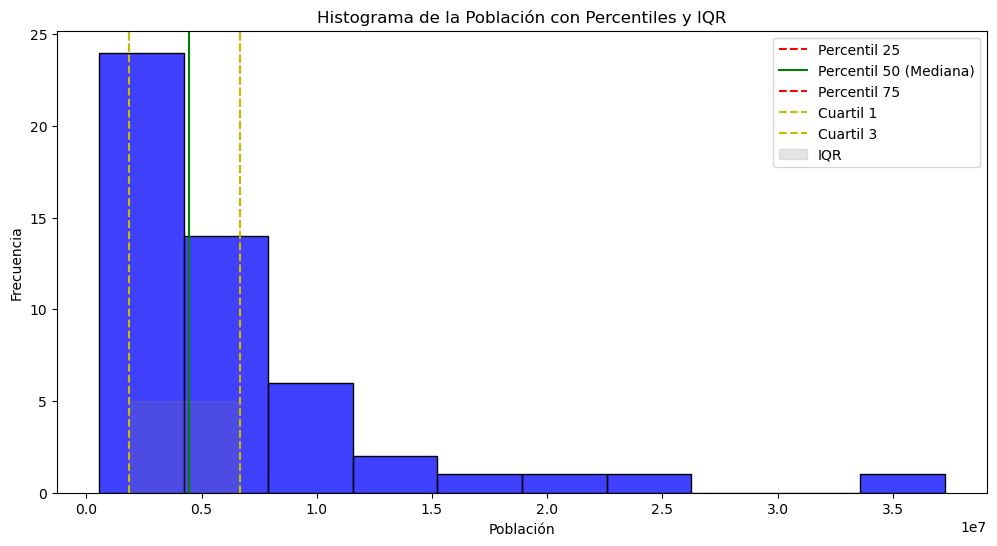

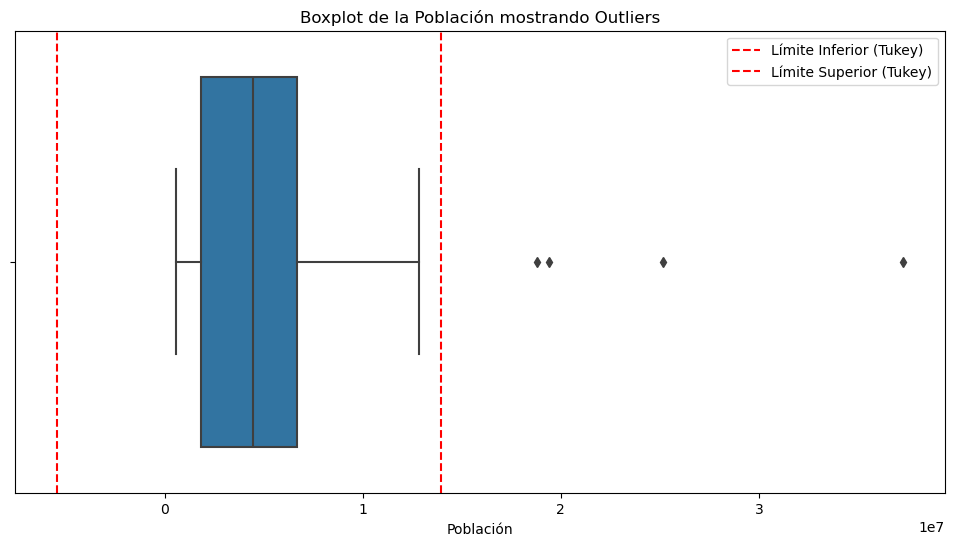

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
file_path = 'state.csv'
state_data = pd.read_csv(file_path)

# Convertir la columna 'Population' a valores numéricos si es necesario
if state_data['Population'].dtype == 'object':
    state_data['Population'] = state_data['Population'].str.replace(',', '').astype(float)

# Calcular percentiles
percentile_25 = np.percentile(state_data['Population'], 25)
percentile_50 = np.percentile(state_data['Population'], 50)
percentile_75 = np.percentile(state_data['Population'], 75)

# Calcular el rango
range_population = state_data['Population'].max() - state_data['Population'].min()

# Calcular el rango intercuartil (IQR)
iqr_population = percentile_75 - percentile_25

# Detectar outliers usando MAD
mad_population = stats.median_abs_deviation(state_data['Population'])
threshold_mad = 3 * mad_population
median_population = np.median(state_data['Population'])
outliers_mad = state_data['Population'][np.abs(state_data['Population'] - median_population) > threshold_mad]

# Detectar outliers usando el criterio de Tukey
q1 = percentile_25
q3 = percentile_75
iqr = iqr_population
lower_bound_tukey = q1 - 1.5 * iqr
upper_bound_tukey = q3 + 1.5 * iqr
outliers_tukey = state_data['Population'][(state_data['Population'] < lower_bound_tukey) | (state_data['Population'] > upper_bound_tukey)]

# Graficar el histograma con percentiles y IQR
plt.figure(figsize=(12, 6))
sns.histplot(state_data['Population'], bins=10, kde=False, color='blue')
plt.axvline(percentile_25, color='r', linestyle='--', label='Percentil 25')
plt.axvline(percentile_50, color='g', linestyle='-', label='Percentil 50 (Mediana)')
plt.axvline(percentile_75, color='r', linestyle='--', label='Percentil 75')
plt.axvline(q1, color='y', linestyle='--', label='Cuartil 1')
plt.axvline(q3, color='y', linestyle='--', label='Cuartil 3')
plt.fill_betweenx([0, 5], q1, q3, color='gray', alpha=0.2, label='IQR')
plt.title('Histograma de la Población con Percentiles y IQR')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Graficar el boxplot que muestre los outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=state_data['Population'])
plt.axvline(lower_bound_tukey, color='r', linestyle='--', label='Límite Inferior (Tukey)')
plt.axvline(upper_bound_tukey, color='r', linestyle='--', label='Límite Superior (Tukey)')
plt.title('Boxplot de la Población mostrando Outliers')
plt.xlabel('Población')
plt.legend()
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
state = pd.read_csv('state.csv')

In [13]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

> **Ejercicio 5**. Convertir la serie de arriba en un dataframe con indices enteros

In [16]:
import pandas as pd

# Crear la serie de ejemplo
population_series = pd.Series([24, 14, 6, 2, 1, 1, 1, 1, 1, 0], 
                              index=[
                                  '(526935.67, 4232659.0]', 
                                  '(4232659.0, 7901692.0]', 
                                  '(7901692.0, 11570725.0]', 
                                  '(11570725.0, 15239758.0]', 
                                  '(15239758.0, 18908791.0]', 
                                  '(18908791.0, 22577824.0]', 
                                  '(22577824.0, 26246857.0]', 
                                  '(26246857.0, 29915890.0]', 
                                  '(29915890.0, 33584923.0]', 
                                  '(33584923.0, 37253956.0]'
                              ], 
                              name='count')

# Convertir la serie a un dataframe con índices enteros
population_df = population_series.reset_index()
population_df.columns = ['Population Range', 'Count']
population_df



,Population Range,Count
0,"(526935.67, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(15239758.0, 18908791.0]",1
5,"(18908791.0, 22577824.0]",1
6,"(22577824.0, 26246857.0]",1
7,"(26246857.0, 29915890.0]",1
8,"(29915890.0, 33584923.0]",1
9,"(33584923.0, 37253956.0]",0


La Tabla 1-5 muestra una tabla de frecuencia de la población por estado:

| BinNumber | BinRange                 | Count | States                                                                                       |
|-----------|--------------------------|-------|----------------------------------------------------------------------------------------------|
| 1         | (526935.67, 4232659.0]   | 24    | Alaska, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Iowa, Kansas, Maine, Mississippi, Montana, Nebraska, Nevada, New Hampshire, New Mexico, North Dakota, Rhode Island, South Dakota, Utah, Vermont, West Virginia, Wyoming, Oklahoma, Oregon |
| 2         | (4232659.0, 7901692.0]   | 14    | Alabama, Arizona, Colorado, Indiana, Kentucky, Louisiana, Maryland, Minnesota, Missouri, South Carolina, Tennessee, Washington, Wisconsin, Massachusetts |
| 3         | (7901692.0, 11570725.0]  | 6     | Georgia, Michigan, New Jersey, North Carolina, Ohio, Virginia                                                                       |
| 4         | (11570725.0, 15239758.0] | 2     | Illinois, Pennsylvania                                                                                       |
| 5         | (15239758.0, 18908791.0] | 1     | Florida                                                                                           |
| 6         | (18908791.0, 22577824.0] | 1     | New York                                                                                           |
| 7         | (22577824.0, 26246857.0] | 1     | Texas                                                                                           |
| 8         | (33584923.0, 37253956.0] | 1     | California                                                                                           |
| 9         | (26246857.0, 29915890.0] | 0     |                                                                                              |
| 10        | (29915890.0, 33584923.0] | 0     |                                                                                              |


> **Ejercicio 6**. Utilice Pandas para obtener la tabla 1-5 dada arriba.

In [20]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo CSV
file_path = 'state.csv'
state_data = pd.read_csv(file_path)

# Convertir la columna 'Population' a valores numéricos si es necesario
if state_data['Population'].dtype == 'object':
    state_data['Population'] = state_data['Population'].str.replace(',', '').astype(float)

# Dividir la población en bins
bins = pd.cut(state_data['Population'], bins=10)

# Contar el número de estados en cada bin
bin_counts = bins.value_counts().sort_index()

# Asignar los estados a cada bin
state_data['Bin'] = bins
states_in_bins = state_data.groupby('Bin')['State'].apply(lambda x: ', '.join(x)).reset_index()

# Crear el DataFrame final con la información
table_1_5 = pd.DataFrame({
    'BinNumber': range(1, len(bin_counts) + 1),
    'BinRange': bin_counts.index.astype(str),
    'Count': bin_counts.values,
    'States': states_in_bins['State']
})

# Mostrar el DataFrame
print(table_1_5)

# Opcional: Guardar el DataFrame como un archivo CSV
table_1_5.to_csv('table_1_5.csv', index=False)


   BinNumber                  BinRange  Count  \
0          1    (526935.67, 4232659.0]     24   
1          2    (4232659.0, 7901692.0]     14   
2          3   (7901692.0, 11570725.0]      6   
3          4  (11570725.0, 15239758.0]      2   
4          5  (15239758.0, 18908791.0]      1   
5          6  (18908791.0, 22577824.0]      1   
6          7  (22577824.0, 26246857.0]      1   
7          8  (26246857.0, 29915890.0]      0   
8          9  (29915890.0, 33584923.0]      0   
9         10  (33584923.0, 37253956.0]      1   

                                              States  
0  Alaska, Arkansas, Connecticut, Delaware, Hawai...  
1  Alabama, Arizona, Colorado, Indiana, Kentucky,...  
2  Georgia, Michigan, New Jersey, North Carolina,...  
3                             Illinois, Pennsylvania  
4                                            Florida  
5                                           New York  
6                                              Texas  
7                   

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20700\300361007.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  states_in_bins = state_data.groupby('Bin')['State'].apply(lambda x: ', '.join(x)).reset_index()
